# Statistics for Data Sciendce with Python
## Module 7 - Peer-Reviewed Assignment
Author: Coralie Jaunin

Submission date: 2024-07-31

### Setup an Import Statements

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import scipy
import seaborn as sns
from statsmodels.regression.linear_model import OLS

In [2]:
PATHS = {
    "main": "../",
}
INPUT_FILES = {
    "boston_data": r"data/boston_housing.csv",
}

In [3]:
sns.set()
sns.set_context("paper", font_scale=0.8)
sns.set_style("ticks")
palette = sns.cubehelix_palette(n_colors=3, start=1, rot=1, hue=1, light=0.25, dark=0.75)
pf = ticker.PercentFormatter(decimals=0)

In [4]:
alpha = 0.05

### Task 1 - Become Familiar with the Dataset
Note: the data is loaded from file rather than URL, which was not cooperating. Please adapt the PATH as necessary to run the Notebook.

In [5]:
boston_df = pd.read_csv(f"{PATHS['main']}{INPUT_FILES['boston_data']}")
print(f"The data has shape {boston_df.shape}")
print(f"Available fileds: {sorted(boston_df.columns)}")
boston_df.head(20)

The data has shape (506, 14)
Available fileds: ['AGE', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'MEDV', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'Unnamed: 0', 'ZN']


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [6]:
boston_df = boston_df.drop(columns=["Unnamed: 0"])
boston_df["disc_age"] = ["35% or less" if y <= 35 else "35% to 70%" if y < 70 else "70% or more" for y in boston_df["AGE"]]
boston_df["bounded"] = ["Bounded" if b == 1 else "Not Bounded" if b == 0 else "" for b in boston_df["CHAS"]]

### Task 2 - Generate Descriptive Statistics and Visualizations

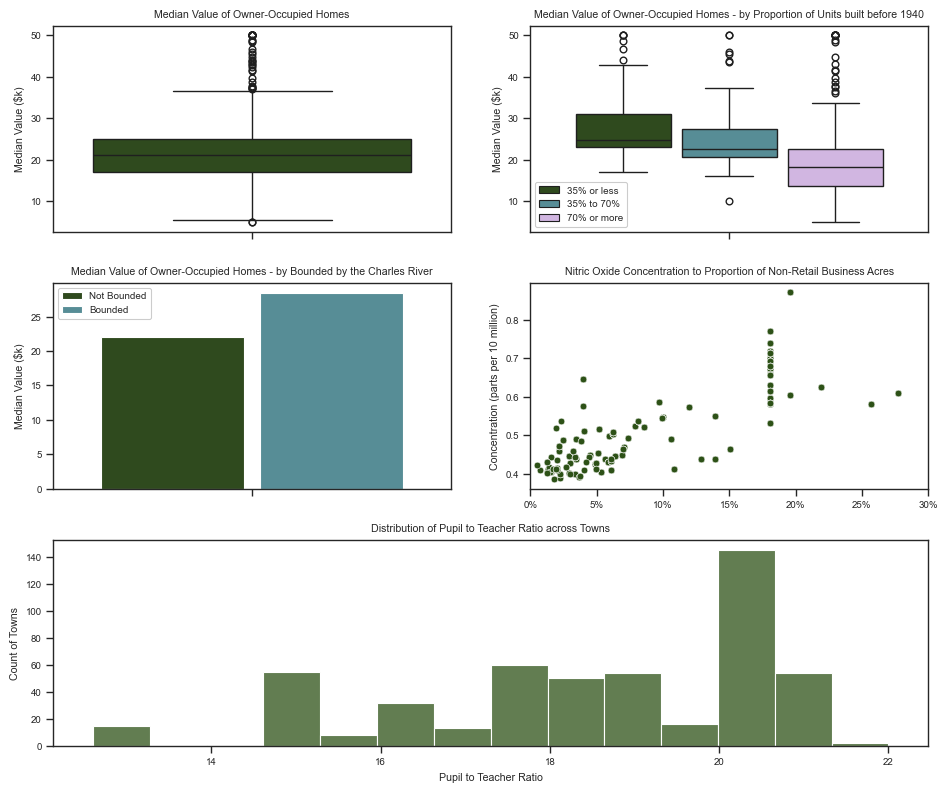

In [7]:
gs = plt.GridSpec(3, 2, hspace=0.25, bottom=0.1, top=0.9, left=0.075, right =0.95, width_ratios=[1, 1], height_ratios=[1, 1, 1])
fig = plt.figure(figsize=(10, 9))
ax1=fig.add_subplot(gs[0, 0])
sns.boxplot(data=boston_df, y="MEDV", color=palette[0], ax=ax1)
ax1.title.set_text("Median Value of Owner-Occupied Homes")
ax1.set_ylabel("Median Value ($k)")
ax2=fig.add_subplot(gs[0, 1])
sns.boxplot(data=boston_df, y="MEDV", hue="disc_age", hue_order=["35% or less", "35% to 70%", "70% or more"], gap=0.1, palette=palette, ax=ax2)
ax2.title.set_text("Median Value of Owner-Occupied Homes - by Proportion of Units built before 1940")
ax2.set_ylabel("Median Value ($k)")
ax2.legend(title="", loc=3, framealpha=1)
ax3=fig.add_subplot(gs[1, 0])
sns.barplot(data=boston_df, y="MEDV", hue="bounded", gap=0.1, errorbar=None, palette=palette[0:2], ax=ax3)
ax3.title.set_text("Median Value of Owner-Occupied Homes - by Bounded by the Charles River")
ax3.set_ylabel("Median Value ($k)")
ax3.legend(title="", loc=2, framealpha=1)
ax4=fig.add_subplot(gs[1, 1])
sns.scatterplot(data=boston_df, x="INDUS", y="NOX", color=palette[0], ax=ax4)
ax4.title.set_text("Nitric Oxide Concentration to Proportion of Non-Retail Business Acres")
ax4.set_xlabel("")
ax4.set_ylabel("Concentration (parts per 10 million)")
ax4.set_xlim(0, 30)
ax4.xaxis.set_major_formatter(pf)
ax5=fig.add_subplot(gs[2, :])
sns.histplot(data=boston_df, x="PTRATIO", color=palette[0], ax=ax5)
ax5.title.set_text("Distribution of Pupil to Teacher Ratio across Towns")
ax5.set_xlabel("Pupil to Teacher Ratio")
ax5.set_ylabel("Count of Towns")
plt.show()

While the relationship between Nitric Oxide Concentrations and the proportion of Non-Retail Business Acres seems positive, a format test needs to be conducted to assert its significance. Furthermore, more than a quarter of observations report a proportion of 18.1%. Understanding the cause behind the preponderance of the value 18.1% is necessary. Is it a data quality issue? Is the variable only available at a more aggregate level, leading many Boston townships to report the same value?

### TASK 3 - Use the appropriate test to answer the questions provided
Is there a significant difference in median value of houses bounded by the Charles river or Not?

H0: $\mu_{\text{bounded}} = \mu_{\text{not bounded}}$

H1: $\mu_{\text{bounded}} \neq \mu_{\text{not bounded}}$

In [8]:
mask_b = boston_df.bounded == "Bounded"
mask_nb = boston_df.bounded == "Not Bounded"
ttest = scipy.stats.ttest_ind(boston_df.loc[mask_b, "MEDV"], boston_df.loc[mask_nb, "MEDV"])
if ttest[1] > alpha:
    print(f"H1 is rejected at the {alpha*100}% elevel with a test statistics of {round(ttest[0], 3)} and a p-value of {round(ttest[1], 3)}.")
else:
    print(f"H1 is accepted at the {alpha*100}% level with a test statistics of {round(ttest[0], 3)} and a p-value of {round(ttest[1], 3)}.")

H1 is accepted at the 5.0% level with a test statistics of 3.996 and a p-value of 0.0.


Is there a difference in Median values of houses for each proportion of owner-occupied units built prior to 1940?

H0: $\mu_{\leq35\%} = \mu_{35\%-70\%} = \mu_{\geq70\%}$

H1: $\mu_{\leq35\%} \neq \mu_{35\%-70\%} \neq \mu_{\geq70\%}$

In [9]:
anova_samples_ls = [boston_df.loc[boston_df.disc_age==y, "MEDV"] for y in boston_df.disc_age.unique()]
ftest = scipy.stats.f_oneway(*anova_samples_ls)
if ftest[1] > alpha:
    print(f"H1 is rejected at the {alpha*100}% elevel with a test statistics of {round(ftest[0], 3)} and a p-value of {round(ftest[1], 3)}.")
else:
    print(f"H1 is accepted at the {alpha*100}% level with a test statistics of {round(ftest[0], 3)} and a p-value of {round(ftest[1], 3)}.")

H1 is accepted at the 5.0% level with a test statistics of 36.408 and a p-value of 0.0.


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

H0: $\rho_{\text{NOX, NRBA Ratio}} = 0$

H1: $\rho_{\text{NOX, NRBA Ratio}} \neq 0$

In [10]:
ptest = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
if ptest[1] > alpha:
    print(f"H1 is rejected at the {alpha*100}% elevel with a test statistics of {round(ptest[0], 3)} and a p-value of {round(ptest[1], 3)}.")
else:
    print(f"H1 is accepted at the {alpha*100}% level with a test statistics of {round(ptest[0], 3)} and a p-value of {round(ptest[1], 3)}.")

H1 is accepted at the 5.0% level with a test statistics of 0.764 and a p-value of 0.0.


What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?

Regression Design: $\text{MEDV}_i = \beta_0 + \beta_1 \text{DIS}_i + \varepsilon_i$

H0: $\beta_1 = 0$

H1: $\beta_1 \neq 0$

In [11]:
reg_formula = "MEDV ~ 1 + DIS"
reg = OLS.from_formula(reg_formula, boston_df).fit()
print(reg.summary())
if reg.pvalues["DIS"] > alpha:
    print(f"H1 is rejected at the {alpha*100}% elevel with a test statistics of {round(reg.tvalues['DIS'], 3)} and a p-value of {round(reg.pvalues['DIS'], 3)}.")
    print("The impact is not statistically significant. We cannot claim that the weighted distance to the five Boston employment centers impact the median value of owner-occupied homes.")
else:
    print(f"H1 is accepted at the {alpha*100}% level with a test statistics of {round(reg.tvalues['DIS'], 3)} and a p-value of {round(reg.pvalues['DIS'], 3)}.")
    print(f"Th impact is statistically significant. An additional weighted distance to the five Boston employment centers impact the median value of owner-occupied homes by {round(reg.params['DIS'], 3)}.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        17:53:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0